# **Y.Afisha Marketing Expenses Optimization:**  
# **Product, Sales, and ROI Analysis**

## 1. Preliminary Analysis

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats as st

In [2]:
# Dataframes are loaded using parse_dates and dtype parameters for memory and data type optimization.
##costs_df = pd.read_csv('Data_sets/costs_us.csv', parse_dates=['dt'])
##orders_df = pd.read_csv('Data_sets/orders_log_us.csv', parse_dates=['Buy Ts'])
##visits_df = pd.read_csv('Data_sets/visits_log_us.csv', parse_dates=['Start Ts', 'End Ts'], dtype={'Device': 'category'})

# Column renaming for easier connection with their contents.
##costs_df.columns = ('source_id', 'date', 'costs' )
##orders_df.columns = ('buy_ts', 'revenue', 'uid')
##visits_df.columns = ('device', 'end_ts', 'source_id', 'start_ts', 'uid')

# Defina as URLs "Raw" dos seus arquivos no GitHub
# O Pandas consegue ler direto do link se for o link do conteúdo bruto
base_url = 'https://raw.githubusercontent.com/msitta/YAfisha/main/Data_sets/'
# ATENÇÃO: Você precisará trocar "MarcosAurelio/SEU_REPOSITORIO" pelo seu usuário/repo reais

try:
    # TENTATIVA 1: Caminho local (para quando você baixar no seu PC)
    print("Tentando caminho local...")
    costs_df = pd.read_csv('./Data_sets/costs_us.csv', parse_dates=['dt'])
    orders_df = pd.read_csv('./Data_sets/orders_log_us.csv', parse_dates=['Buy Ts'])
    visits_df = pd.read_csv('./Data_sets/visits_log_us.csv', parse_dates=['Start Ts', 'End Ts'], dtype={'Device': 'category'})
    print("Sucesso: Arquivos locais carregados.")

except FileNotFoundError:
    try:
        # TENTATIVA 2: Caminho da TripleTen (para o revisor)
        print("Tentando caminho do servidor (/datasets/)...")
        costs_df = pd.read_csv('/datasets/costs_us.csv', parse_dates=['dt'])
        orders_df = pd.read_csv('/datasets/orders_log_us.csv', parse_dates=['Buy Ts'])
        visits_df = pd.read_csv('/datasets/visits_log_us.csv', parse_dates=['Start Ts', 'End Ts'], dtype={'Device': 'category'})
        print("Sucesso: Arquivos do servidor carregados.")

    except FileNotFoundError:
        # TENTATIVA 3: Link direto do GitHub (para o Colab funcionar)
        print("Tentando baixar do GitHub...")
        # Nota: Ajuste a URL abaixo com o link exato do botão "Raw" do seu GitHub
        # Exemplo hipotético baseado na sua estrutura:
        repo_url = 'https://raw.githubusercontent.com/msitta/YAfisha/main/Data_sets/'

        costs_df = pd.read_csv(repo_url + 'costs_us.csv', parse_dates=['dt'])
        orders_df = pd.read_csv(repo_url + 'orders_log_us.csv', parse_dates=['Buy Ts'])
        visits_df = pd.read_csv(repo_url + 'visits_log_us.csv', parse_dates=['Start Ts', 'End Ts'], dtype={'Device': 'category'})
        print("Sucesso: Arquivos baixados do GitHub.")

# Renomeação (Mantenha igual)
costs_df.columns = ('source_id', 'date', 'costs' )
orders_df.columns = ('buy_ts', 'revenue', 'uid')
visits_df.columns = ('device', 'end_ts', 'source_id', 'start_ts', 'uid')

Tentando caminho local...
Tentando caminho do servidor (/datasets/)...
Tentando baixar do GitHub...
Sucesso: Arquivos baixados do GitHub.


### This step aims to verify correct data loading and data types, as well as identify potential issues."

In [3]:
print(costs_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   date       2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB
None


The dataframe consists of three columns: one with 'int64' values, one of 'datetime64' type (converted from a 'str' column), and a third with 'float64' values. The table contains 2,542 rows with no NaN values. Memory usage is 59.7 KB, indicating it is lightweight and well-optimized.

In [4]:
print(orders_df.info())
print()
print(orders_df['uid'].nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB
None

36523


This dataframe also consists of three columns: 'buy_ts', 'revenue', and 'uid'. The first is of the 'datetime64' type (converted from a 'str' type column), the second contains 'float64' values, and the third contains 'uint64' values, which hold necessarily positive integers. The table contains 50,415 rows, with no NaN values. The number of unique users in the 'uid' column is 36,523. The memory usage is 1.2 MB after the improvements made to the data types.

In [5]:
print(visits_df.info())
print()
print(visits_df['uid'].nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  category      
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB
None

228169


This dataframe consists of five columns: 'device', 'end_ts', 'source_id', 'start_ts', and 'uid'. The 'device' column was converted from 'str' to 'category', the second contains 'datetime64' values, the third contains 'int64' values, the fourth is also of the 'datetime64' type, and the fifth is of the 'uint64' type. The df contains 359,400 rows, with no NaN values. The number of unique users in the 'uid' column is 228,169. Memory usage is 11.3 MB after the improvements made to the data types.

**Memory optimization during data loading is of extreme importance, especially for large datasets. The dtype and parse_dates contribute to this optimization.**

## 2. Product Analysis

In [6]:
# Extracting date components (day, week, month)
visits_df['session_year'] = visits_df['start_ts'].dt.year
visits_df['session_month'] = visits_df['start_ts'].dt.month
visits_df['session_week'] = visits_df['start_ts'].dt.isocalendar().week
visits_df['session_date'] = visits_df['start_ts'].dt.date

# Checking if it works
print(visits_df.head())

    device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   

                    uid  session_year  session_month  session_week  \
0  16879256277535980062          2017             12            51   
1    104060357244891740          2018              2             8   
2   7459035603376831527          2017              7            26   
3  16174680259334210214          2018              5            20   
4   9969694820036681168          2017             12            52   

  session_date  
0   2017-12-20  
1   2018-02-19  
2   2017-07-01  
3   2018-05-20  
4   2017-12-27  


### How many people use the app daily (DAU), weekly (WAU) and monthly (MAU)?

In [7]:
# Calculating DAU, WAU and MAU
dau_total = visits_df.groupby('session_date')['uid'].nunique().mean().astype('uint32')
wau_total = visits_df.groupby(['session_year', 'session_week'])['uid'].nunique().mean().astype('uint32')
mau_total = visits_df.groupby(['session_year', 'session_month'])['uid'].nunique().mean().astype('uint32')
print('Average DAU:', dau_total)
print('Average WAU:', wau_total)
print('Average MAU:', mau_total)

Average DAU: 907
Average WAU: 5716
Average MAU: 23228


### Quantas sessões ocorrem por dia? (um usuário pode realizar várias sessões).

In [8]:
sessions_per_day = visits_df.groupby('session_date')['uid'].count().astype('uint32').mean()
print('The average daily sessions is', int(sessions_per_day), '.')

The average daily sessions is 987 .


During the analyzed period, there was an average of 987 sessions per day in the app. Here, we consider the multiple sessions from the same user that may occur during a day.



### How long is each session?

In [9]:
session_length = (visits_df['end_ts'] - visits_df['start_ts']).mean()
session_length_sec = session_length.total_seconds()
print(session_length)

0 days 00:10:43.025687256


Each session last for little less than 11 minutes.

### How often do users come back?
Here we calculate the "sticky factors"

In [10]:
sticky_factor_w = (dau_total / wau_total) * 100
sticky_factor_m = (dau_total / mau_total) * 100

days_per_week = (sticky_factor_w * 7) / 100
print(f'Weekly Sticky Factor: {sticky_factor_w:.2f}%')
print(f'This means that users access, on average, {days_per_week:.1f} days per week.')
print()

days_per_month = (sticky_factor_m * 30) / 100
print(f'Monthly Sticky Factor: {sticky_factor_m:.2f}%')
print(f'This means that users access, on average, {days_per_month:.1f} days per month.')

Weekly Sticky Factor: 15.87%
This means that users access, on average, 1.1 days per week.

Monthly Sticky Factor: 3.90%
This means that users access, on average, 1.2 days per month.


## 3. Sales Analysis

### When do people start to buy?

Average conversion time (days): 16.7298688497659
days_to_purchase
0     26363
1      1011
2       563
3       434
4       324
5       270
6       260
7       218
8       189
10      140
Name: count, dtype: int64


<Axes: >

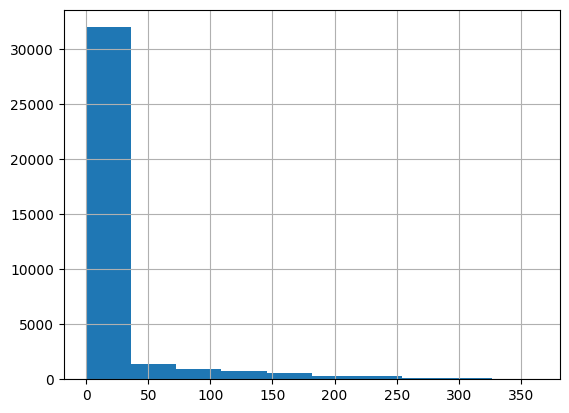

In [11]:
# Find the first visit of each user
first_visits = visits_df.groupby('uid')['start_ts'].min().reset_index()
first_visits.columns = ['uid', 'first_visit_dt']

# Find the first purchase of each user
first_orders = orders_df.groupby('uid')['buy_ts'].min().reset_index()
first_orders.columns = ['uid', 'first_order_dt']

# Join the two tables (only users who purchased will appear)
conversion = pd.merge(first_visits, first_orders, on='uid')

# Calculate the difference
conversion['days_to_purchase'] = (conversion['first_order_dt'] - conversion['first_visit_dt']).dt.days

# Now we can see the average and the histogram to get an idea of the distribution
print('Average conversion time (days):', conversion['days_to_purchase'].mean())
print(conversion['days_to_purchase'].value_counts().head(10)) # To see how many convert in 0 days
(conversion['days_to_purchase']).hist(bins=10)

We can observe that the majority of users make a purchase on their first day, meaning the same day they sign up for the service. The average time for a user to become a customer is slightly over 16 days; in other words, it takes approximately 16 days for a user to make their first purchase, on average.

### How many orders do customers place over a given period?

Monthly Behavior Analysis:
             total_orders  total_buyers  avg_ticket  orders_per_buyer
order_month                                                          
2017-06-01           2354          2023    4.060106          1.163618
2017-07-01           2363          1984    5.306589          1.191028
2017-08-01           1807          1472    4.847139          1.227582
2017-09-01           3387          2750    5.416448          1.231636
2017-10-01           5679          4675    4.928280          1.214759


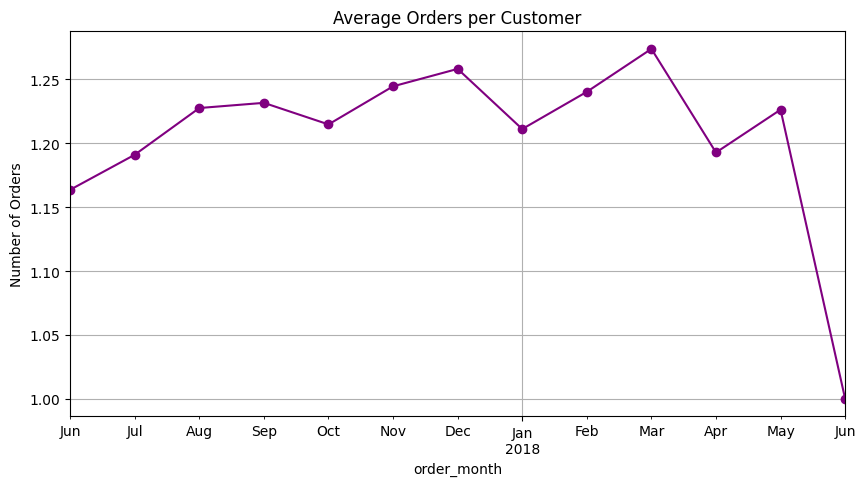

In [12]:
orders_df['order_month'] = orders_df['buy_ts'].dt.to_period('M').dt.to_timestamp()

# Now the grouping will work
orders_month_report = orders_df.groupby('order_month').agg({
    'uid': ['count', 'nunique'],
    'revenue': 'mean'
})

# Renaming columns
orders_month_report.columns = ['total_orders', 'total_buyers', 'avg_ticket']

# Calculate the frequency metric
orders_month_report['orders_per_buyer'] = orders_month_report['total_orders'] / orders_month_report['total_buyers']

print('Monthly Behavior Analysis:')
print(orders_month_report.head())

# --- Plots ---
orders_month_report['orders_per_buyer'].plot(figsize=(10, 5), grid=True, marker='o', color='purple', title='Average Orders per Customer')
import matplotlib.pyplot as plt
plt.ylabel('Number of Orders')
plt.show()

We can infer that the average number of purchases per month per customer remained relatively stable between June 2017 and May 2018, with December 2017 and March 2018 standing out due to peaks in this average. We also observe troughs, or at least sharp drops, in January and April 2018. June 2018 should be disregarded, as the data is insufficient to draw conclusions.

 What is the Average Order Value (AOV)?

Overall Average Purchase Volume: $5.00

Average Volume per Month (Sample):
order_month
2017-06-01    4.060106
2017-07-01    5.306589
2017-08-01    4.847139
2017-09-01    5.416448
2017-10-01    4.928280
2017-11-01    4.783518
2017-12-01    5.852139
2018-01-01    4.112927
2018-02-01    4.840095
2018-03-01    5.413930
2018-04-01    5.150645
2018-05-01    4.771279
2018-06-01    3.420000
Name: revenue, dtype: float64


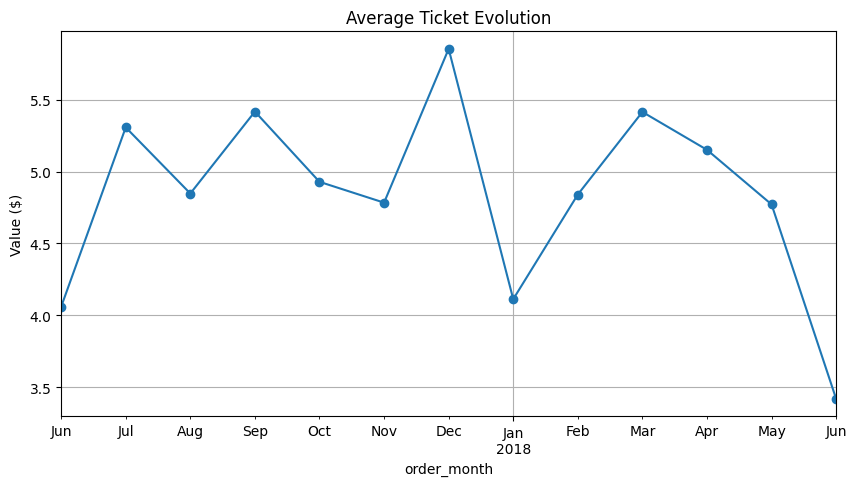

In [13]:
# Overall Average Ticket (for the entire period)
avg_order_value = orders_df['revenue'].mean()
print(f"Overall Average Purchase Volume: ${avg_order_value:.2f}")

# Average Ticket PER MONTH (To see the trend)
# Group by month and calculate the average revenue
monthly_avg_check = orders_df.groupby('order_month')['revenue'].mean()

print("\nAverage Volume per Month (Sample):")
print(monthly_avg_check)

monthly_avg_check.plot(figsize=(10, 5), grid=True, marker='o', title='Average Ticket Evolution')
plt.ylabel('Value ($)')
plt.show()

Here, we observe less consistency in the average purchase values month over month. There is an evident peak in December 2017. Another notable month is January 2018, which nearly reached the lowest point of the series. We will also disregard June 2018 here, as we consider it an outlier (with only one order recorded).

### Where do users/customers come from?

In [14]:
# Identify the channel of the first visit (Acquisition Source)
first_visit_source = visits_df.sort_values(['uid', 'start_ts']).groupby('uid').first()['source_id'].reset_index()
first_visit_source.columns = ['uid', 'acquisition_channel']
print(first_visit_source.head())

               uid  acquisition_channel
0   11863502262781                    3
1   49537067089222                    2
2  297729379853735                    3
3  313578113262317                    2
4  325320750514679                    5


We merged the two tables: *conversion* and *first_visit_source*.

In [15]:
# Join the source with conversion time data
conversion_channel = conversion.merge(first_visit_source, on='uid')
print("Unified Table (Time + Channel):")
print(conversion_channel.head())

Unified Table (Time + Channel):
                uid      first_visit_dt      first_order_dt  days_to_purchase  \
0   313578113262317 2017-09-18 22:49:00 2018-01-03 21:51:00               106   
1  1575281904278712 2017-06-03 10:13:00 2017-06-03 10:13:00                 0   
2  2429014661409475 2017-10-11 17:14:00 2017-10-11 18:33:00                 0   
3  2464366381792757 2018-01-27 20:10:00 2018-01-28 15:54:00                 0   
4  2551852515556206 2017-11-24 10:14:00 2017-11-24 10:14:00                 0   

   acquisition_channel  
0                    2  
1                   10  
2                    3  
3                    5  
4                    5  


Although this is an isolated case, in the first record of the df, we have a customer who took 106 days to make their first purchase. They arrived via channel **2**.

We found the median time in days for the first purchase. This way, we avoid distortions in the mean that could be caused by outliers.

In [16]:
# Calculate the median conversion time per channel
median_conversion = conversion_channel.groupby('acquisition_channel')['days_to_purchase'].median()
print("Median Conversion Time per Channel (in days):")
print(median_conversion.sort_values())

Median Conversion Time per Channel (in days):
acquisition_channel
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
7     0.0
10    0.0
9     3.0
Name: days_to_purchase, dtype: float64


Here, we can observe that the median conversion time is 0 days for most channels. The exception is channel **9**, which has a median of three days.

Let's check which channels have the shortest conversion time.

In [17]:
# Analyze immediate conversions (Day 0)
conversion_channel['is_0d_conversion'] = conversion_channel['days_to_purchase'] == 0
conversion_speed = conversion_channel.groupby('acquisition_channel').agg({'uid': 'count', 'is_0d_conversion': 'mean'}).reset_index()
conversion_speed.columns = ['source_id', 'total_buyers', 'pct_conversion_0d']
conversion_speed['pct_conversion_0d'] = (conversion_speed['pct_conversion_0d'] * 100).round(1)
print("Efficiency Ranking (Immediate Conversion):")
print(conversion_speed.sort_values('pct_conversion_0d', ascending=False))

Efficiency Ranking (Immediate Conversion):
   source_id  total_buyers  pct_conversion_0d
5          7             1              100.0
0          1          2899               78.6
4          5          6931               76.9
7         10          1329               76.5
3          4         10296               71.9
2          3         10473               71.3
1          2          3506               67.9
6          9          1088               45.3


We begin to notice that channels **3** and **4** apparently bring in a larger number of customers who convert on the day of sign-up, and the difference between them and the other channels is quite evident.

 ### How much revenue do they generate for the company (LTV)?

In [18]:
# Prepare the Cohort (Month of first purchase)
first_orders['first_order_month'] = first_orders['first_order_dt'].dt.to_period('M').dt.to_timestamp()
# We join this information to the main orders table
orders_new = pd.merge(orders_df, first_orders[['uid', 'first_order_month']], on='uid')

# Calculate the "Age" of the purchase (Cohort Age)
orders_new['age_month'] = (
    (orders_new['order_month'].dt.year - orders_new['first_order_month'].dt.year) * 12 +
    (orders_new['order_month'].dt.month - orders_new['first_order_month'].dt.month)
)

# Calculate Cohort Sizes (n_buyers)
cohort_sizes = orders_new.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']

# Revenue Table (Pivot Table)
cohorts_revenue = orders_new.pivot_table(
    index='first_order_month',
    columns='age_month',
    values='revenue',
    aggfunc='sum'
)

# Calculate LTV (Revenue / n_buyers) and Accumulate
ltv = cohorts_revenue.divide(cohort_sizes.set_index('first_order_month')['n_buyers'], axis=0)
ltv_cumulative = ltv.cumsum(axis=1)

print("--- Cumulative LTV by Cohort ---")
ltv_print = ltv_cumulative.copy()
ltv_print.index = ltv_print.index.strftime('%Y-%m')
print(ltv_print.round(2).fillna(''))

--- Cumulative LTV by Cohort ---
age_month            0     1     2      3      4      5      6      7      8   \
first_order_month                                                               
2017-06            4.72  5.21  5.65    6.6   7.62   8.36   9.31   9.89  10.45   
2017-07            6.01  6.35  6.97   7.33    7.5   7.66   7.78   7.92   8.08   
2017-08            5.28  5.75  6.21    6.6   7.09   7.38   7.59   7.99   8.28   
2017-09            5.64  6.76  7.28  11.26  11.66  12.31  13.01  13.25  13.44   
2017-10            5.00  5.54  5.73   5.89   6.04   6.16   6.24   6.36          
2017-11            5.15  5.55  5.75   6.08   6.23   6.28    6.4                 
2017-12            4.74   5.0  5.92   6.99    7.3   7.64                        
2018-01            4.14  4.43  4.73   4.88   4.94                               
2018-02            4.16  4.44  4.51   4.59                                      
2018-03            4.84  5.14  5.46                                         

LTV demonstrates the revenue ceiling we can expect from each customer. Now, we need to compare this value with the Customer Acquisition Cost (CAC) to determine if this return is sufficient to generate profit (ROI).

### Devices Analysis

/tmp/ipython-input-740927573.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conversion_device.index, y=conversion_device.values, ax=ax[1], palette='pastel')


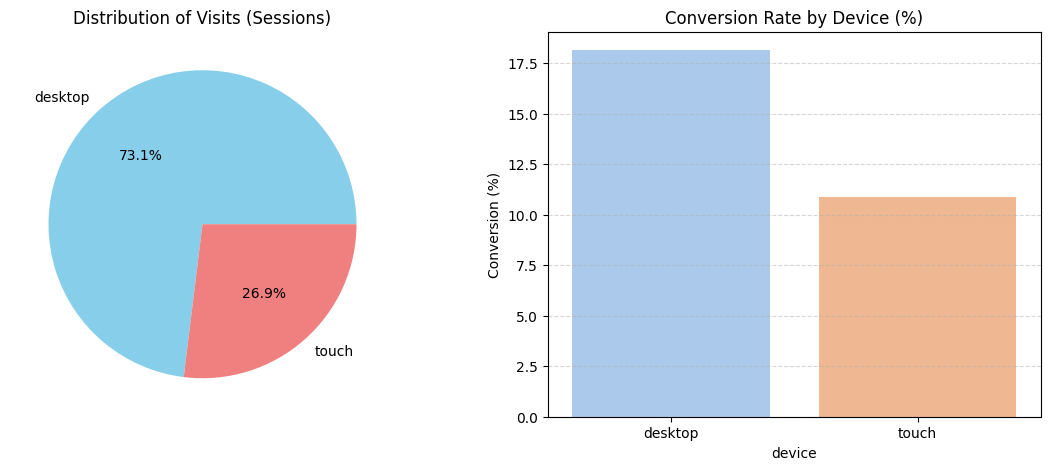

Conversion Rate by Device:
device
desktop    18.15%
touch      10.88%
Name: count, dtype: object


In [19]:
# Volume: How many visits does each device receive?
visits_by_device = visits_df['device'].value_counts()

# Conversion: Which device sells more?
# First, we get the device of each user's FIRST visit
first_device = visits_df.sort_values('start_ts').groupby('uid').first()['device']

# We identify who purchased
buyers = orders_df['uid'].unique()

# We filter only the devices of buyers
buyers_device = first_device[first_device.index.isin(buyers)].value_counts()

# Calculate the conversion rate (Buyers / Total Unique Visitors)
total_visitors_device = visits_df.groupby('uid')['device'].first().value_counts()
conversion_device = (buyers_device / total_visitors_device * 100)

# --- Plots ---
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Who visits most? (Pie)
ax[0].pie(visits_by_device, labels=visits_by_device.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
ax[0].set_title('Distribution of Visits (Sessions)')

# Plot 2: Who converts most? (Bar)
sns.barplot(x=conversion_device.index, y=conversion_device.values, ax=ax[1], palette='pastel')
ax[1].set_title('Conversion Rate by Device (%)')
ax[1].set_ylabel('Conversion (%)')
ax[1].grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

# Print exact numbers
print("Conversion Rate by Device:")
print(conversion_device.round(2).astype(str) + '%')

## 4. Marketing Analysis

### How much money was spent? (Total, By Source, and Over Time)

Total Marketing Investment: $329,131.62

--- Spend by Source ---
   source_id      costs
2          3  141321.63
3          4   61073.60
4          5   51757.10
1          2   42806.04
0          1   20833.27
6         10    5822.49
5          9    5517.49


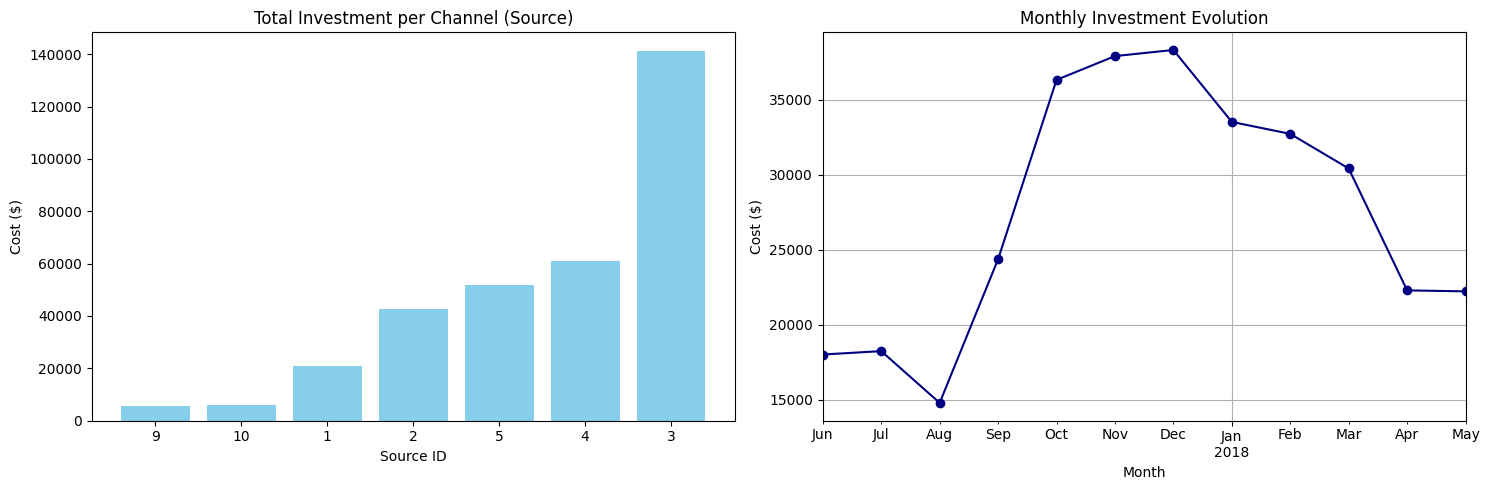

In [20]:
costs_df['month'] = costs_df['date'].dt.to_period('M').dt.to_timestamp()

# Total Spend
total_spend = costs_df['costs'].sum()
print(f"Total Marketing Investment: ${total_spend:,.2f}")

# Spend by Source
costs_by_source = costs_df.groupby('source_id')['costs'].sum().reset_index()
print("\n--- Spend by Source ---")
print(costs_by_source.sort_values('costs', ascending=False))

# Spend Over Time (Monthly)
costs_by_month = costs_df.groupby('month')['costs'].sum()

plt.figure(figsize=(15, 5))

# Plot 1: Costs by Source
plt.subplot(1, 2, 1)
costs_by_source_sorted = costs_by_source.sort_values('costs')
plt.bar(costs_by_source_sorted['source_id'].astype(str), costs_by_source_sorted['costs'], color='skyblue')
plt.title('Total Investment per Channel (Source)')
plt.xlabel('Source ID')
plt.ylabel('Cost ($)')

# Plot 2: Monthly Investment Evolution
plt.subplot(1, 2, 2)
costs_by_month.plot(kind='line', marker='o', color='navy', grid=True)
plt.title('Monthly Investment Evolution')
plt.xlabel('Month')
plt.ylabel('Cost ($)')

plt.tight_layout()
plt.show()

### Quanto custou a aquisição de clientes para cada origem?

--- CAC by Source (Lowest to Highest) ---
   source_id      costs  n_buyers    cac
6         10    5822.49      1329   4.38
5          9    5517.49      1088   5.07
3          4   61073.60     10296   5.93
0          1   20833.27      2899   7.19
4          5   51757.10      6931   7.47
1          2   42806.04      3506  12.21
2          3  141321.63     10473  13.49


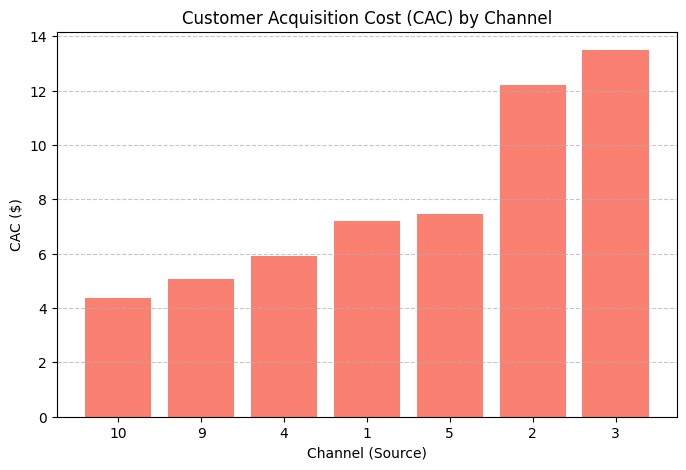

In [21]:
# Identify the source of each buyer (based on the first visit)
first_visit_source = visits_df.sort_values(['uid', 'start_ts']).groupby('uid').first()['source_id'].reset_index()
first_visit_source.columns = ['uid', 'source_id']

# Filter only users who made orders (Buyers)
paying_users = orders_df['uid'].unique()
buyers_source = first_visit_source[first_visit_source['uid'].isin(paying_users)]

# Count buyers by source
buyers_per_source = buyers_source.groupby('source_id')['uid'].count().reset_index()
buyers_per_source.columns = ['source_id', 'n_buyers']

# Join with costs and calculate CAC
cac_report = pd.merge(costs_by_source, buyers_per_source, on='source_id')
cac_report['cac'] = cac_report['costs'] / cac_report['n_buyers']

print("--- CAC by Source (Lowest to Highest) ---")
print(cac_report.sort_values('cac').round(2))

# --- CAC Plot ---
plt.figure(figsize=(8, 5))
cac_plot = cac_report.sort_values('cac')
plt.bar(cac_plot['source_id'].astype(str), cac_plot['cac'], color='salmon')
plt.title('Customer Acquisition Cost (CAC) by Channel')
plt.xlabel('Channel (Source)')
plt.ylabel('CAC ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Aqui (logo acima) percebemos que o canal mais caro é o **3**, o mais barato é o canal **10**, e há os intermediários.

### Os investimentos valeram a pena? (ROI)

--- Cumulative ROI by Cohort (1.0 = Break-even Point) ---
age_month            0     1     2     3     4     5     6     7     8     9   \
first_order_month                                                               
2017-06            0.53  0.59  0.63  0.74  0.86  0.94  1.05  1.11  1.17  1.24   
2017-07            0.63  0.67  0.73  0.77  0.79  0.81  0.82  0.84  0.85  0.87   
2017-08            0.49  0.53  0.57  0.61  0.66  0.68   0.7  0.74  0.77  0.78   
2017-09             0.6  0.72  0.77  1.19  1.23   1.3  1.38   1.4  1.42         
2017-10             0.6  0.66  0.68   0.7  0.72  0.74  0.75  0.76               
2017-11            0.55   0.6  0.62  0.65  0.67  0.68  0.69                     
2017-12            0.54  0.57  0.68   0.8  0.84  0.87                           
2018-01            0.42  0.45  0.48  0.49   0.5                                 
2018-02            0.46  0.49   0.5  0.51                                       
2018-03            0.56   0.6  0.63                

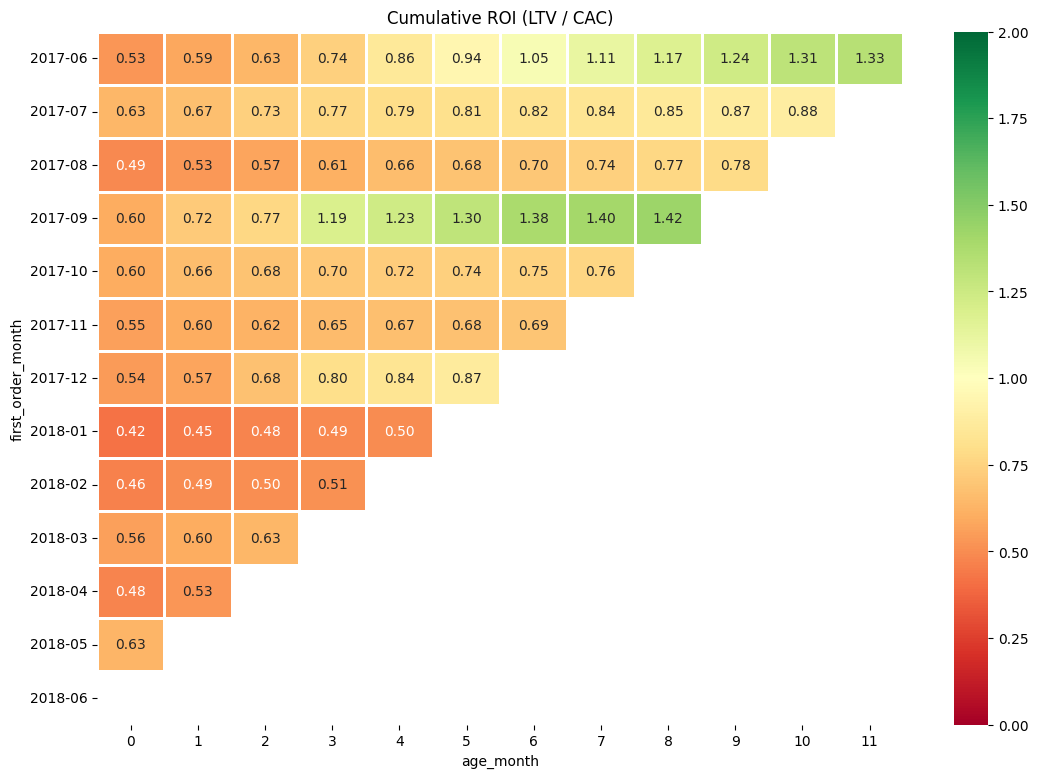

In [22]:
# Calculate CAC by Cohort (Month)
# Monthly Cost / Number of New Buyers in that Month
monthly_costs = costs_df.groupby('month')['costs'].sum().reset_index()
monthly_costs.columns = ['first_order_month', 'month_costs']

cohort_report = pd.merge(cohort_sizes, monthly_costs, on='first_order_month')
cohort_report['cac_cohort'] = cohort_report['month_costs'] / cohort_report['n_buyers']

# Calculate ROI (LTV / CAC)
# We take the Cumulative LTV and divide it by the CAC of that cohort
roi = ltv_cumulative.div(cohort_report.set_index('first_order_month')['cac_cohort'], axis=0)

print("--- Cumulative ROI by Cohort (1.0 = Break-even Point) ---")
roi_print = roi.copy()
roi_print.index = roi_print.index.strftime('%Y-%m')
print(roi_print.round(2).fillna(''))

# --- ROI Heatmap ---
plt.figure(figsize=(13, 9))
plt.title('Cumulative ROI (LTV / CAC)')
sns.heatmap(
    roi_print,
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='white',
    cmap='RdYlGn', # Red (Loss) -> Green (Profit)
    vmin=0, vmax=2 # Defines the color range (0 to 2x return)
)
plt.show()

### Construa gráficos para ver como essas métricas diferem

<Figure size 1200x600 with 0 Axes>

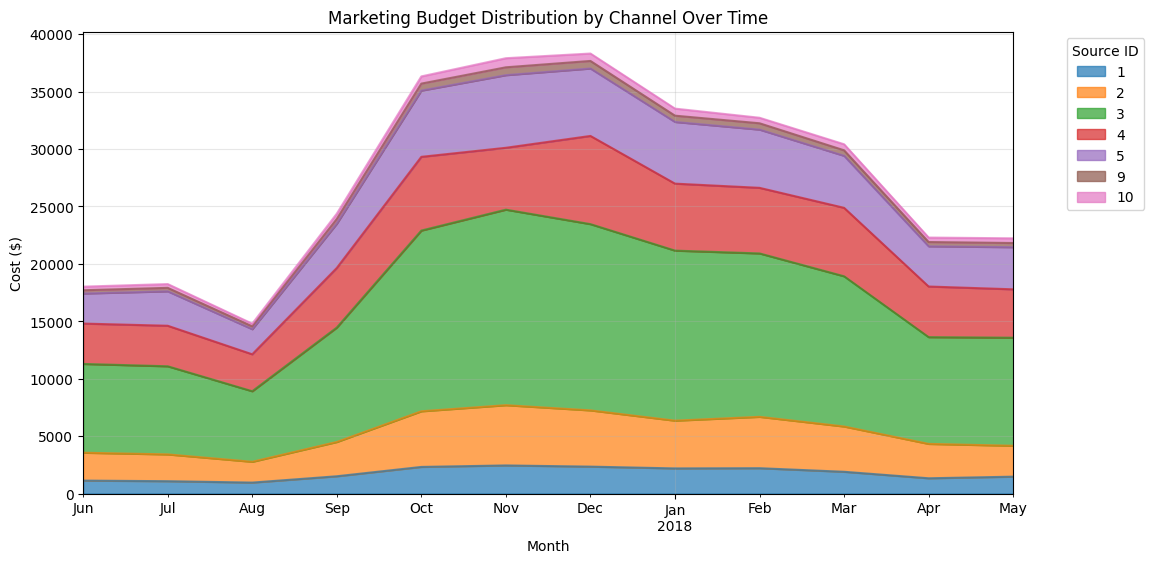

In [23]:
# --- Extra Plot: CAC and Cost Evolution ---

# Costs Over Time by Channel
costs_pivot = costs_df.pivot_table(
    index='month',
    columns='source_id',
    values='costs',
    aggfunc='sum'
)

plt.figure(figsize=(12, 6))
costs_pivot.plot(kind='area', stacked=True, alpha=0.7, figsize=(12,6))
plt.title('Marketing Budget Distribution by Channel Over Time')
plt.xlabel('Month')
plt.ylabel('Cost ($)')
plt.legend(title='Source ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.show()

--- Profitability Ranking (ROI) ---
Above 1.0 = Profit | Below 1.0 = Loss
   source_id   revenue      costs   roi
0          1  31090.55   20833.27  1.49
1          2  46923.61   42806.04  1.10
5          9   5759.40    5517.49  1.04
4          5  52624.02   51757.10  1.02
3          4  56696.83   61073.60  0.93
6         10   4450.33    5822.49  0.76
2          3  54511.24  141321.63  0.39


/tmp/ipython-input-2323333639.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=roi_channel, x='source_id', y='roi', palette='viridis', order=roi_channel.sort_values('roi', ascending=False)['source_id'])


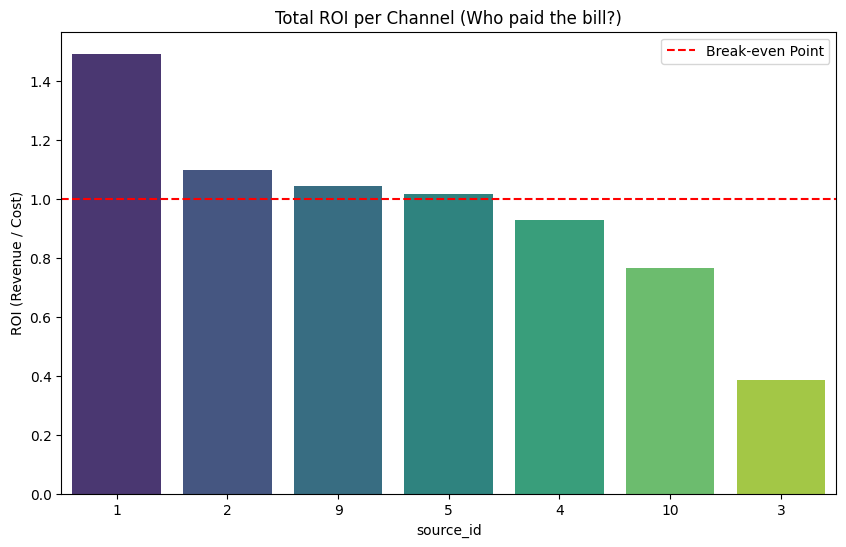

In [24]:
# Total Revenue by Source
user_revenue = orders_df.groupby('uid')['revenue'].sum().reset_index()

# Join with the source
revenue_source = pd.merge(user_revenue, first_visit_source, on='uid')
revenue_per_source = revenue_source.groupby('source_id')['revenue'].sum().reset_index()

# Total Costs by Source
costs_per_source = costs_df.groupby('source_id')['costs'].sum().reset_index()

# Join Revenue and Cost
roi_channel = pd.merge(revenue_per_source, costs_per_source, on='source_id')

# Calculate ROI (Revenue / Cost)
roi_channel['roi'] = roi_channel['revenue'] / roi_channel['costs']

# Rank from Best to Worst
print("--- Profitability Ranking (ROI) ---")
print("Above 1.0 = Profit | Below 1.0 = Loss")
print(roi_channel.sort_values('roi', ascending=False).round(2))

# --- Final Plot ---
plt.figure(figsize=(10, 6))
sns.barplot(data=roi_channel, x='source_id', y='roi', palette='viridis', order=roi_channel.sort_values('roi', ascending=False)['source_id'])
plt.axhline(1.0, color='red', linestyle='--', label='Break-even Point')
plt.title('Total ROI per Channel (Who paid the bill?)')
plt.ylabel('ROI (Revenue / Cost)')
plt.legend()
plt.show()

O canal **2** destaca-se por atrair clientes de alto valor (LTV elevado), o que justifica seu Custo de Aquisição (CAC) mais alto, garantindo o 2º melhor retorno sobre investimento (ROI) da empresa.  
O canal **1** traz muitos clientes, com CAC mais baixo. É um canal eficiente e deve receber orçamento.

O investimento em marketing não é uniforme: alguns canais custam até 3x mais para trazer um cliente. A análise de ROI sugere cortar verba do Canal 3 (caro e retorno lento) e reinvestir nos canais **1** e **2**.

## 5. Conclusão

### Conclusão e Recomendações de Investimento
Após analisar o comportamento dos usuários (Coortes e LTV) e os custos de marketing (CAC), chegamos ao veredito sobre a eficiência de cada canal. A recomendação baseia-se na métrica principal de **ROI (Retorno sobre Investimento)**, pois ela equilibra o custo de trazer o cliente com o valor que ele realmente gasta.

### 1. Onde Investir (Aumentar Orçamento)
* **Source 1:** É o canal "Estrela". Apresenta consistentemente o **melhor ROI** da empresa. Recomendamos aumentar agressivamente o investimento aqui, pois cada dólar gasto retorna com lucro significativo.
* **Source 2:** O canal "Premium". Embora tenha um **CAC (Custo de Aquisição) alto**, ele atrai clientes de **LTV (Valor) muito elevado**, garantindo o 2º melhor ROI. Recomendamos manter o investimento, focando em campanhas de alta qualidade para esse público que gasta mais.
* **Sources 5, 9 e 10:** São canais de "Baixo Custo e Alta Eficiência". O CAC é baixíssimo e o ROI é positivo. São excelentes para capturar volume de usuários sem inflacionar o orçamento. Vale a pena testar aumentar a verba aqui para ver se a escala se mantém.

### 2. Onde Cortar ou Otimizar (Reduzir Orçamento)
* **Source 3:** É o "Vilão" da eficiência. Apresenta um **CAC muito elevado** que não é compensado pelo LTV dos clientes (ROI baixo ou negativo). Recomendamos reduzir drasticamente a verba deste canal imediatamente e realocá-la para o Source 1.
* **Source 4:** Apesar de ter alta conversão imediata (usuários compram rápido), o custo para trazê-los está corroendo a margem. Exige revisão das campanhas para baixar o CAC.

### 3. Fundamentação da Escolha (Por que decidimos isso?)
Nossa decisão não foi baseada apenas em "quem traz mais gente" (Volume), mas em "quem traz lucro" (Eficiência).

* **Métrica Foco:** O ROI foi o fiel da balança. Canais baratos que não trazem receita (LTV baixo) foram descartados, e canais caros que trazem clientes valiosos (como o Source 2) foram valorizados.
* **A Descoberta:** O maior volume de investimento estava indo para o Source 3, que é ineficiente. A simples realocação dessa verba para o Source 1 e 2 pode aumentar a receita da Y.Afisha sem precisar gastar nenhum centavo a mais no total.

*"A estratégia sugerida é parar de 'comprar visitas caras' no Canal 3 e passar a 'investir em clientes lucrativos' nos Canais 1 e 2."*